In [0]:
from fastai.vision import *

In [3]:
from google.colab import files

uploaded = files.upload()

for casquette in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=casquette, length=len(uploaded[casquette])))

Saving download_casquettes.csv to download_casquettes (1).csv
User uploaded file "download_casquettes.csv" with length 20848 bytes


In [4]:
uploaded = files.upload()

for chapeau in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=chapeau, length=len(uploaded[chapeau])))

Saving download_chapeau.csv to download_chapeau (1).csv
User uploaded file "download_chapeau.csv" with length 29598 bytes


In [0]:
path = Path('data/couvre_chefs')
folder = "casquettes"
file = casquette
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [6]:
dest

PosixPath('data/couvre_chefs/casquettes')

In [7]:
download_images(file, dest)

Error https://www.rebellion-timepieces.com/uploads/styles/1240x500/catalogues_product_image/shop-casquette-grise.jpg HTTPSConnectionPool(host='www.rebellion-timepieces.com', port=443): Read timed out. (read timeout=4)


In [8]:
path.ls()

[PosixPath('data/couvre_chefs/cleaned.csv'),
 PosixPath('data/couvre_chefs/chapeaux'),
 PosixPath('data/couvre_chefs/models'),
 PosixPath('data/couvre_chefs/casquettes')]

In [0]:
folder = "chapeaux"
file = chapeau
dest = path/folder
dest.mkdir(parents=True, exist_ok=True)

In [10]:
path.ls()

[PosixPath('data/couvre_chefs/cleaned.csv'),
 PosixPath('data/couvre_chefs/chapeaux'),
 PosixPath('data/couvre_chefs/models'),
 PosixPath('data/couvre_chefs/casquettes')]

In [11]:
download_images(chapeau, dest)

Error https://www.private-avenue.com/chapeau-panama-classique-homme-coloris-naturel-ig-377.jpg HTTPSConnectionPool(host='www.private-avenue.com', port=443): Max retries exceeded with url: /chapeau-panama-classique-homme-coloris-naturel-ig-377.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5f7f040208>, 'Connection to www.private-avenue.com timed out. (connect timeout=4)'))
Error https://www.private-avenue.com/chapeau-panama-femme-coloris-naturel-ig-376.jpg HTTPSConnectionPool(host='www.private-avenue.com', port=443): Max retries exceeded with url: /chapeau-panama-femme-coloris-naturel-ig-376.jpg (Caused by ConnectTimeoutError(<urllib3.connection.VerifiedHTTPSConnection object at 0x7f5f809ed550>, 'Connection to www.private-avenue.com timed out. (connect timeout=4)'))
Error https://www.seletti.it/wp-content/uploads/2016/08/Seletti-Objects-Concrete-Bombetta-10090-2.jpg HTTPSConnectionPool(host='www.seletti.it', port=443): Read timed out. (read 

In [12]:
path.ls()

[PosixPath('data/couvre_chefs/cleaned.csv'),
 PosixPath('data/couvre_chefs/chapeaux'),
 PosixPath('data/couvre_chefs/models'),
 PosixPath('data/couvre_chefs/casquettes')]

In [13]:
for c in ["casquettes", "chapeaux"]:
    print(c)
    verify_images(path/c, delete=True, max_size=500)

casquettes


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


cannot identify image file <_io.BufferedReader name='data/couvre_chefs/casquettes/00000135.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:914: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


chapeaux


cannot identify image file <_io.BufferedReader name='data/couvre_chefs/chapeaux/00000175.jpg'>


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:967: UserWarning: Couldn't allocate palette entry for transparency
  "for transparency")


int() argument must be a string, a bytes-like object or a number, not 'tuple'
cannot identify image file <_io.BufferedReader name='data/couvre_chefs/chapeaux/00000148.jpg'>


# Create an image databunch 

In the following ImageDataBunch object, we have all the data inside two folders but we don't have a training set and a test set. That's why we'll add : 

```train="."``` --> which corresponds to the current folder
&
```valid_pct =0.2``` --> Which corresponds to the train_test_split

In [0]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [15]:
data.classes

['casquettes', 'chapeaux']

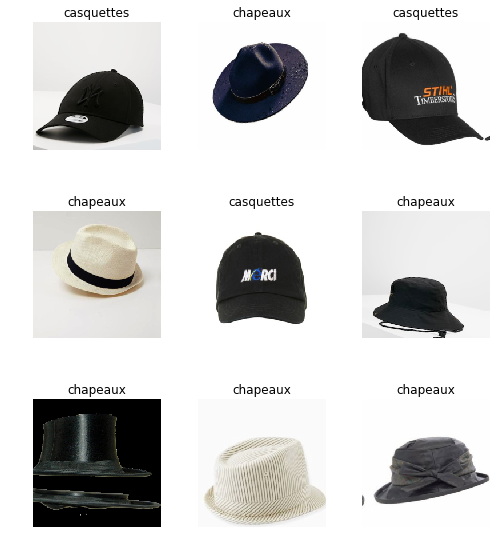

In [16]:
data.show_batch(rows=3, figsize=(7,8))

# Let's check what we have in the training set and the test set 

In [17]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['casquettes', 'chapeaux'], 2, 394, 98)

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [19]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,0.737158,0.286537,0.102041,02:40
1,0.491248,0.200081,0.112245,02:43
2,0.370575,0.227597,0.102041,02:41
3,0.303160,0.251405,0.102041,02:41


In [0]:
learn.save('stage-1')

In [21]:
learn.lr_find() # This step is necessary to see a graph of your learning rate / loss

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


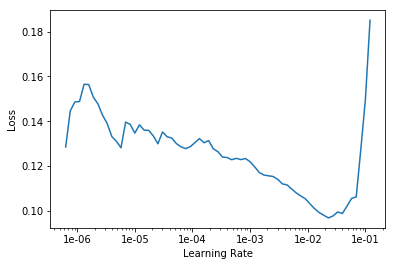

In [22]:
learn.recorder.plot()

In [0]:
learn.unfreeze() # Needed to retrain your model 

In [24]:
learn.fit_one_cycle(4, max_lr = 1e-06)

epoch,train_loss,valid_loss,error_rate,time
0,0.127715,0.269964,0.102041,03:42
1,0.149077,0.284033,0.112245,03:42
2,0.139637,0.282930,0.102041,03:41
3,0.137779,0.286147,0.102041,03:41


In [25]:
learn.model

Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (rel

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

In [27]:
interp.most_confused(min_val=2)

[('chapeaux', 'casquettes', 7), ('casquettes', 'chapeaux', 3)]

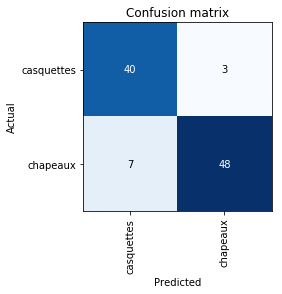

In [28]:
interp.plot_confusion_matrix()

## Cleaning up Data 

In [0]:
from fastai.widgets import *


In [0]:
ds, idxs = DatasetFormatter().from_toplosses(learn)